In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling1D, LSTM, Embedding, Bidirectional
from tensorflow.compat.v1.data import get_output_shapes
from tensorflow.keras.backend import clear_session
from tensorflow.compat.v1 import reset_default_graph
print(tf.__version__)

2.3.0


In [8]:
clear_session()
reset_default_graph()
# 设置显存自动增长
physical_devices = tf.config.list_physical_devices('GPU')
for physical_device in physical_devices:
    tf.config.experimental.set_memory_growth(physical_device, enable=True)

In [9]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset: tf.raw_ops.PrefetchDataset = dataset["train"]
test_dataset: tf.raw_ops.PrefetchDataset = dataset["test"]

In [10]:
tokenizer: tfds.deprecated.text.SubwordTextEncoder = info.features['text'].encoder

In [11]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset: tf.raw_ops.ShuffleDataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset: tf.raw_ops.PaddedBatchDataset = train_dataset.padded_batch(BATCH_SIZE, get_output_shapes(train_dataset))
test_dataset: tf.raw_ops.PaddedBatchDataset = test_dataset.padded_batch(BATCH_SIZE, get_output_shapes(test_dataset))

In [12]:
model = Sequential([
    Embedding(input_dim=tokenizer.vocab_size, output_dim=64, name="embedding_1", input_length=None),    # input_length=None表示长度可变
    Bidirectional(LSTM(units=64, return_sequences=False), name="LSTM_2"),
    Dense(units=64, activation='relu', name="dense_3"),
    Dense(units=1, activation='sigmoid', name="dense_4")
], name="IMDBsubwords_classifier")
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)
model.summary()

Model: "IMDBsubwords_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
LSTM_2 (Bidirectional)       (None, 128)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [13]:
NUM_EPOCHS = 10
history = model.fit(
    train_dataset, 
    validation_data=test_dataset,
    epochs=NUM_EPOCHS, 
    workers=-1,
    use_multiprocessing=True
)

Epoch 1/10
391/391 [==============================] - 64s 139ms/step - loss: 0.6071 - accuracy: 0.6447 - val_loss: 0.4946 - val_accuracy: 0.7879
Epoch 2/10
391/391 [==============================] - 54s 137ms/step - loss: 0.3658 - accuracy: 0.8551 - val_loss: 0.4962 - val_accuracy: 0.8352
Epoch 3/10
391/391 [==============================] - 54s 138ms/step - loss: 0.3321 - accuracy: 0.8635 - val_loss: 0.4431 - val_accuracy: 0.8150
Epoch 4/10
391/391 [==============================] - 55s 139ms/step - loss: 0.2518 - accuracy: 0.9034 - val_loss: 0.3941 - val_accuracy: 0.8356
Epoch 5/10
391/391 [==============================] - 54s 136ms/step - loss: 0.1952 - accuracy: 0.9298 - val_loss: 0.4329 - val_accuracy: 0.8322
Epoch 6/10
391/391 [==============================] - 54s 136ms/step - loss: 0.1866 - accuracy: 0.9274 - val_loss: 0.6364 - val_accuracy: 0.6466
Epoch 7/10
391/391 [==============================] - 54s 137ms/step - loss: 0.2889 - accuracy: 0.8780 - val_loss: 0.5157 - val_ac

In [14]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

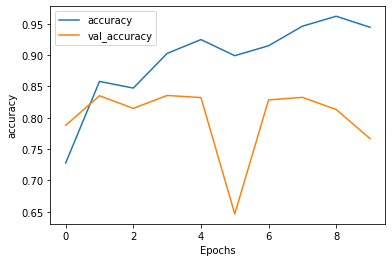

In [15]:
plot_graphs(history, 'accuracy')

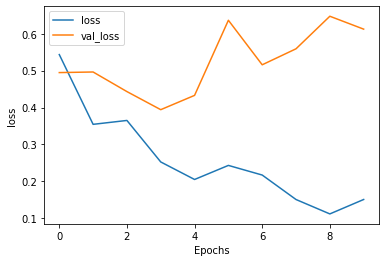

In [16]:
plot_graphs(history, 'loss')